In [41]:
import pandas as pd
pd.set_option('display.max_columns', 100)

import warnings
warnings.simplefilter('ignore')

import matplotlib.pyplot as plt
import numpy as np

In [2]:
df=pd.read_csv('LoansTrainingSet.csv')

### EDA

In [3]:
df.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,000025bb-5694-4cff-b17d-192b1a98ba44,5ebc8bb1-5eb9-4404-b11b-a6eebc401a19,Fully Paid,11520,Short Term,741.0,10+ years,Home Mortgage,33694.0,Debt Consolidation,$584.03,12.3,41.0,10,0,6760,16056,0.0,0.0
1,00002c49-3a29-4bd4-8f67-c8f8fbc1048c,927b388d-2e01-423f-a8dc-f7e42d668f46,Fully Paid,3441,Short Term,734.0,4 years,Home Mortgage,42269.0,other,"$1,106.04",26.3,NaN,17,0,6262,19149,0.0,0.0
2,00002d89-27f3-409b-aa76-90834f359a65,defce609-c631-447d-aad6-1270615e89c4,Fully Paid,21029,Short Term,747.0,10+ years,Home Mortgage,90126.0,Debt Consolidation,"$1,321.85",28.8,NaN,5,0,20967,28335,0.0,0.0
3,00005222-b4d8-45a4-ad8c-186057e24233,070bcecb-aae7-4485-a26a-e0403e7bb6c5,Fully Paid,18743,Short Term,747.0,10+ years,Own Home,38072.0,Debt Consolidation,$751.92,26.2,NaN,9,0,22529,43915,0.0,0.0
4,0000757f-a121-41ed-b17b-162e76647c1f,dde79588-12f0-4811-bab0-e2b07f633fcd,Fully Paid,11731,Short Term,746.0,4 years,Rent,50025.0,Debt Consolidation,$355.18,11.5,NaN,12,0,17391,37081,0.0,0.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256984 entries, 0 to 256983
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan ID                       256984 non-null  object 
 1   Customer ID                   256984 non-null  object 
 2   Loan Status                   256984 non-null  object 
 3   Current Loan Amount           256984 non-null  int64  
 4   Term                          256984 non-null  object 
 5   Credit Score                  195308 non-null  float64
 6   Years in current job          245508 non-null  object 
 7   Home Ownership                256984 non-null  object 
 8   Annual Income                 195308 non-null  float64
 9   Purpose                       256984 non-null  object 
 10  Monthly Debt                  256984 non-null  object 
 11  Years of Credit History       256984 non-null  float64
 12  Months since last delinquent  116601 non-nul

In [5]:
df.isnull().sum()

Loan ID                              0
Customer ID                          0
Loan Status                          0
Current Loan Amount                  0
Term                                 0
Credit Score                     61676
Years in current job             11476
Home Ownership                       0
Annual Income                    61676
Purpose                              0
Monthly Debt                         0
Years of Credit History              0
Months since last delinquent    140383
Number of Open Accounts              0
Number of Credit Problems            0
Current Credit Balance               0
Maximum Open Credit                  0
Bankruptcies                       529
Tax Liens                           23
dtype: int64

In [6]:
df.describe()

,Current Loan Amount,Credit Score,Annual Income,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Bankruptcies,Tax Liens
count,2.569840e+05,195308.000000,1.953080e+05,256984.000000,116601.000000,256984.000000,256984.000000,2.569840e+05,256455.000000,256961.000000
mean,1.371331e+07,1251.116099,7.195272e+04,18.290195,34.881450,11.106267,0.156628,1.540656e+04,0.110316,0.027203
std,3.438131e+07,1762.016848,5.887757e+04,7.075747,21.854165,4.982982,0.460731,1.966506e+04,0.336229,0.245950
min,5.050000e+02,585.000000,0.000000e+00,3.400000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000
25%,8.299000e+03,714.000000,4.432100e+04,13.500000,16.000000,8.000000,0.000000,5.974000e+03,0.000000,0.000000
50%,1.429800e+04,733.000000,6.124200e+04,17.000000,32.000000,10.000000,0.000000,1.107800e+04,0.000000,0.000000
75%,2.436700e+04,744.000000,8.646200e+04,21.700000,51.000000,14.000000,0.000000,1.931900e+04,0.000000,0.000000
max,1.000000e+08,7510.000000,8.713547e+06,70.500000,176.000000,76.000000,11.000000,1.731412e+06,7.000000,11.000000


In [7]:
df.corr(numeric_only=True)

,Current Loan Amount,Credit Score,Annual Income,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Bankruptcies,Tax Liens
Current Loan Amount,1.000000,-0.139743,0.024069,0.014725,0.003488,-0.003094,-0.000062,0.003138,0.003576,-0.003069
Credit Score,-0.139743,1.000000,-0.033221,-0.011658,-0.007994,0.008124,0.000777,-0.003263,-0.003426,0.004381
Annual Income,0.024069,-0.033221,1.000000,0.146859,-0.059675,0.140463,-0.013672,0.292165,-0.044837,0.038185
Years of Credit History,0.014725,-0.011658,0.146859,1.000000,-0.039695,0.128033,0.061251,0.201001,0.062049,0.020915
Months since last delinquent,0.003488,-0.007994,-0.059675,-0.039695,1.000000,-0.035803,0.088612,-0.024292,0.112907,0.002730
Number of Open Accounts,-0.003094,0.008124,0.140463,0.128033,-0.035803,1.000000,-0.013731,0.222763,-0.022805,0.005754
Number of Credit Problems,-0.000062,0.000777,-0.013672,0.061251,0.088612,-0.013731,1.000000,-0.103814,0.755866,0.584917
Current Credit Balance,0.003138,-0.003263,0.292165,0.201001,-0.024292,0.222763,-0.103814,1.000000,-0.117995,-0.011118
Bankruptcies,0.003576,-0.003426,-0.044837,0.062049,0.112907,-0.022805,0.755866,-0.117995,1.000000,0.046160
Tax Liens,-0.003069,0.004381,0.038185,0.020915,0.002730,0.005754,0.584917,-0.011118,0.046160,1.000000


### Data Visulations

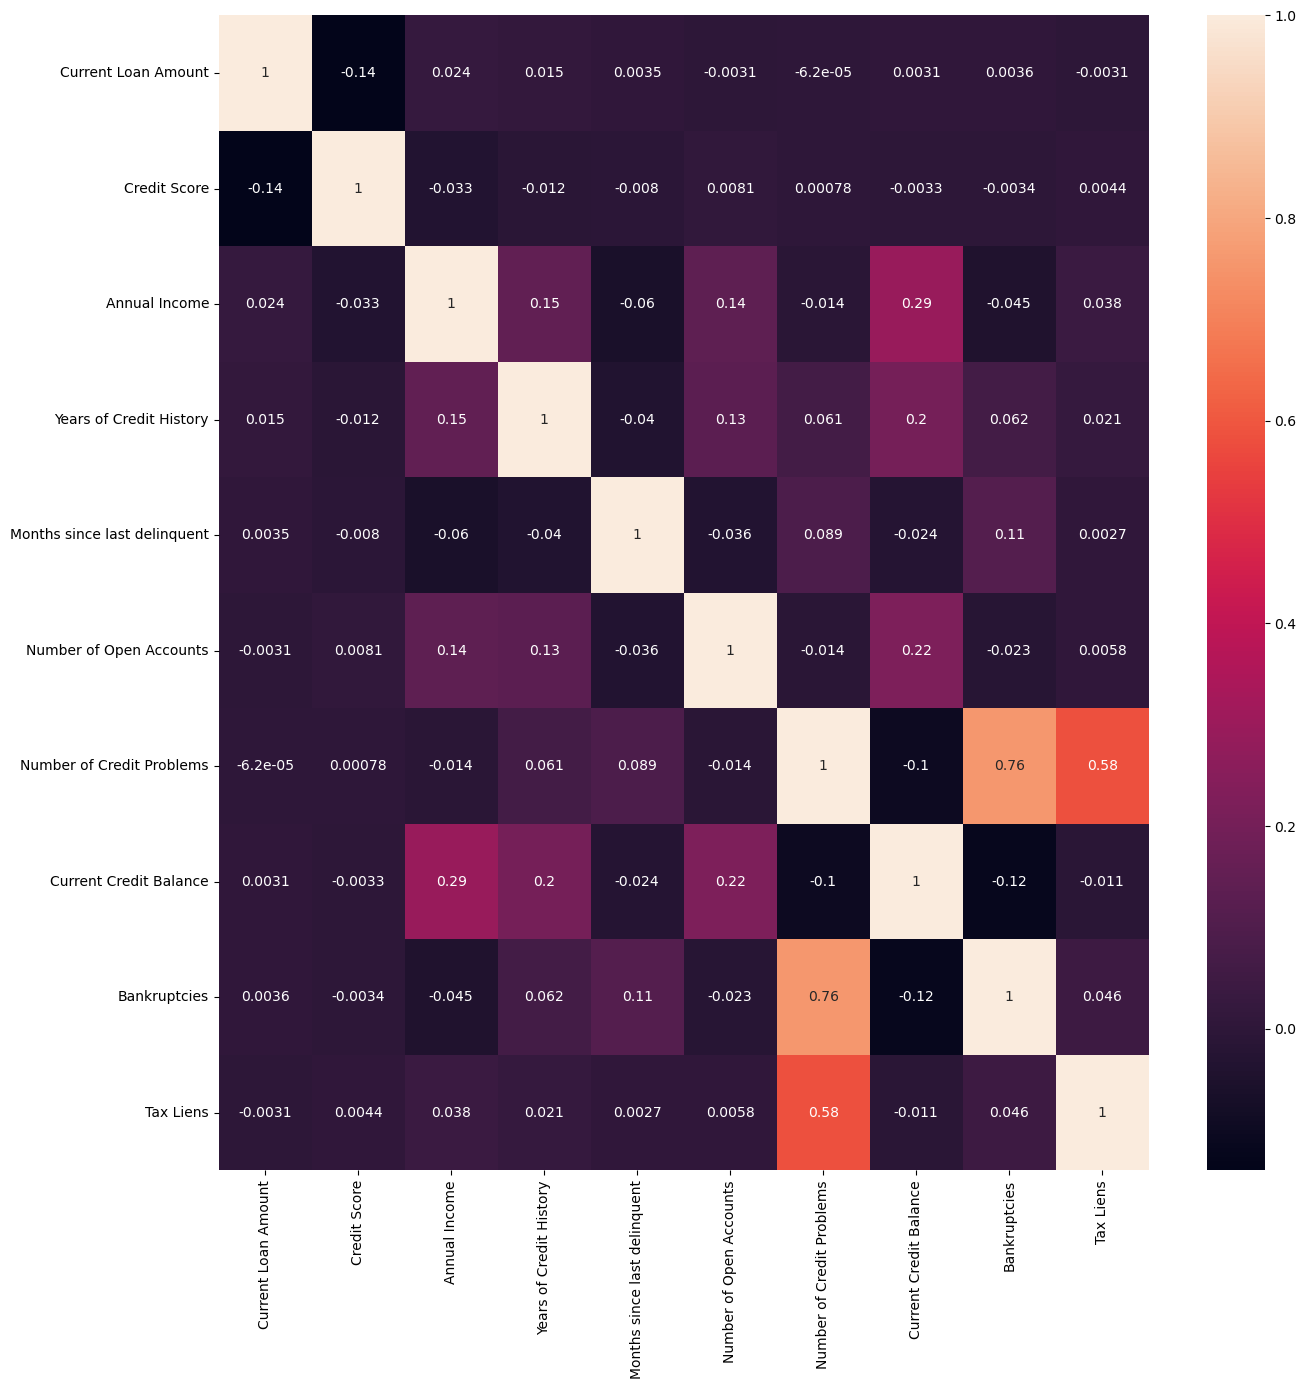

In [8]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(numeric_only=True),annot=True);

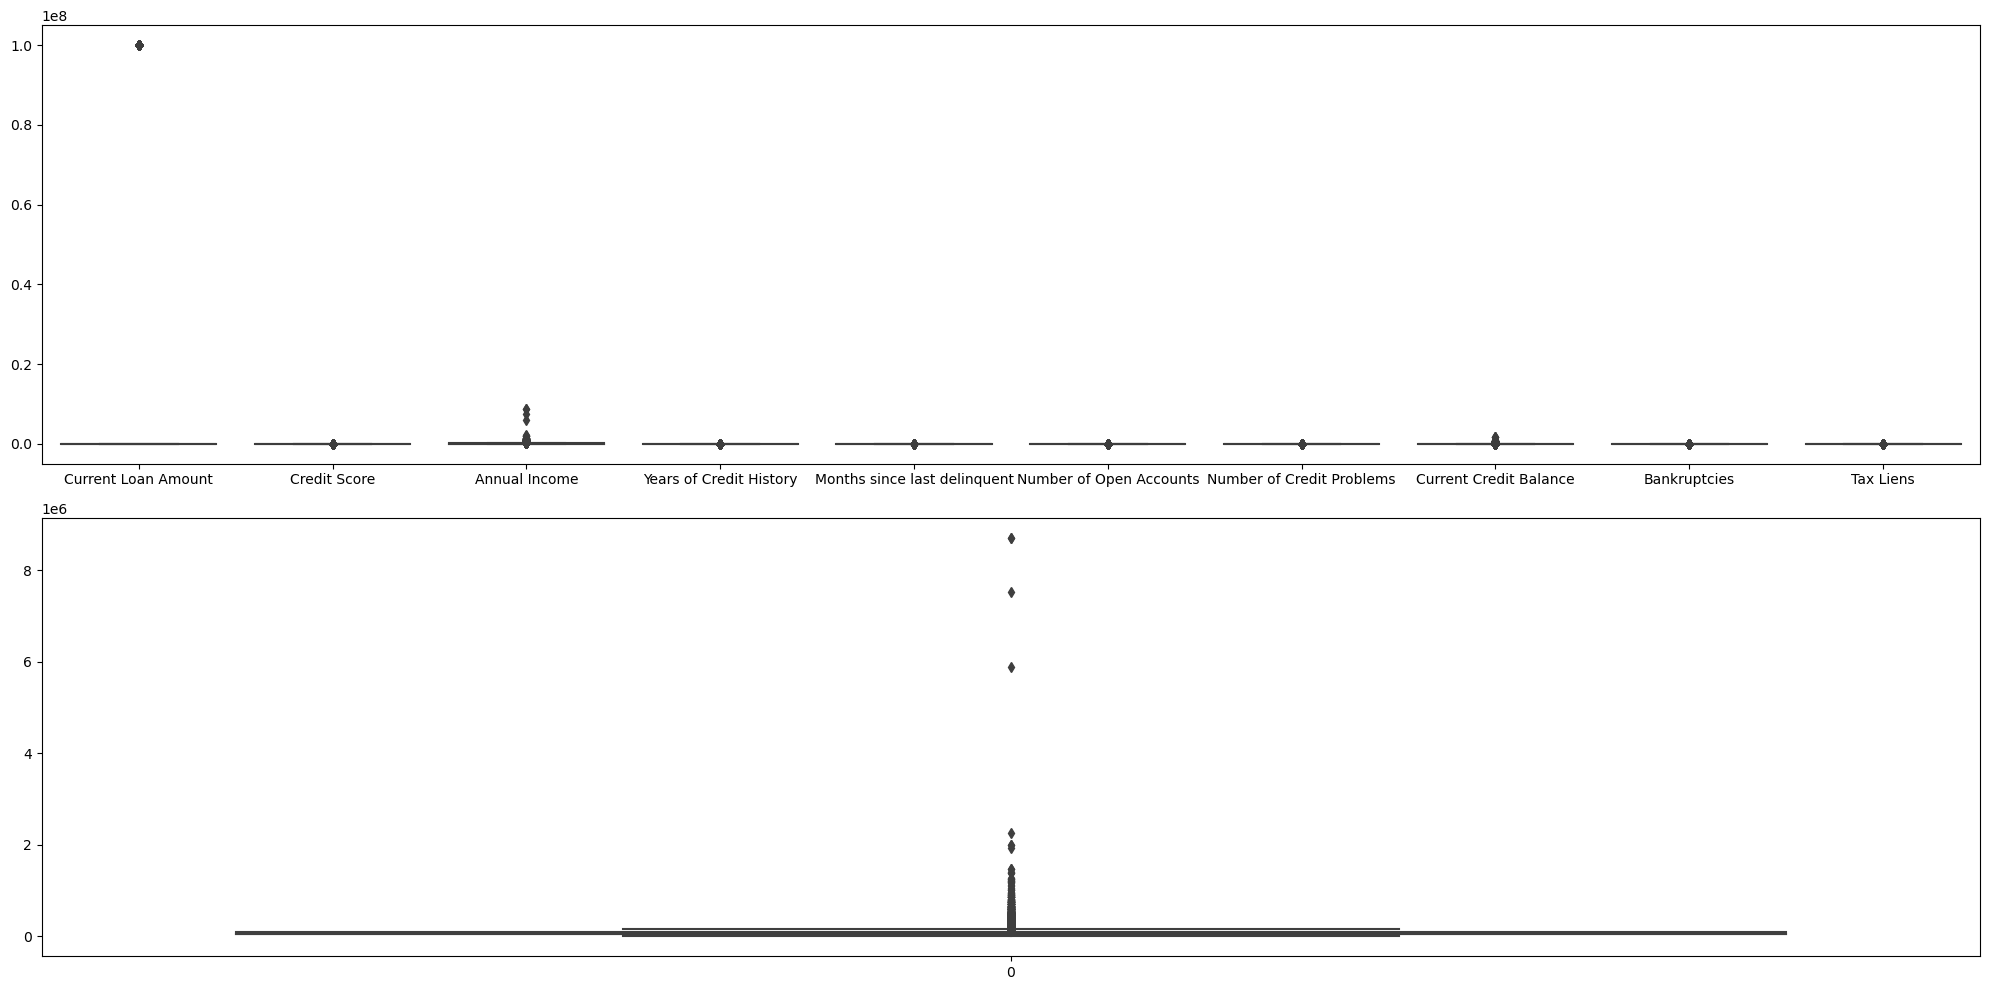

In [9]:
fig = plt.figure(figsize=(20,10))
fig.add_subplot(2,1,1)
sns.boxplot(data=df)
fig.add_subplot(2,1,2)
sns.boxplot(df['Annual Income'])
plt.tight_layout();


In [10]:
df['Annual Income']

0          33694.0
1          42269.0
2          90126.0
3          38072.0
4          50025.0
            ...   
256979         NaN
256980     77186.0
256981     52504.0
256982     52504.0
256983    117480.0
Name: Annual Income, Length: 256984, dtype: float64

In [11]:
df.shape

(256984, 19)

### Feature Enginering

In [12]:
df['Customer ID'].nunique()

215700

In [13]:
df['Loan ID'].nunique()

215700

In [14]:
df.drop_duplicates(subset=['Loan ID','Customer ID'],inplace=True)

In [15]:
df['Credit Score'].fillna(df['Credit Score'].mean(),inplace=True)  

In [16]:
df=df[df['Credit Score']<2000]

In [17]:
df.shape

(201267, 19)

In [18]:
df['Annual Income'].fillna(df['Annual Income'].mean(),inplace=True)
df['Months since last delinquent'].fillna(df['Months since last delinquent'].mean(),inplace=True)
df['Bankruptcies'].fillna(df['Bankruptcies'].mean(),inplace=True)
df['Tax Liens'].fillna(df['Tax Liens'].mean(),inplace=True,)

In [19]:
df['Years in current job'].replace('[^0-9]',"",inplace=True,regex=True)
df['Years in current job'].fillna('0',inplace=True)
df['Years in current job']=df['Years in current job'].astype(int)
df['Years in current job'].replace('0',df['Years in current job'].mean(),inplace=True)

In [20]:
df.isnull().sum()

Loan ID                         0
Customer ID                     0
Loan Status                     0
Current Loan Amount             0
Term                            0
Credit Score                    0
Years in current job            0
Home Ownership                  0
Annual Income                   0
Purpose                         0
Monthly Debt                    0
Years of Credit History         0
Months since last delinquent    0
Number of Open Accounts         0
Number of Credit Problems       0
Current Credit Balance          0
Maximum Open Credit             0
Bankruptcies                    0
Tax Liens                       0
dtype: int64

In [21]:
print(set(df['Loan Status'].values.tolist()))
print(set(df['Term'].values.tolist()))

{'Fully Paid', 'Charged Off'}
{'Short Term', 'Long Term'}


In [22]:
df['Loan Status']=df['Loan Status'].map({'Fully Paid':1,'Charged Off':0}).astype(int)
df['Term']=df['Term'].map({'Long Term':1,'Short Term':0}).astype(int)

In [23]:
df['Months since last delinquent']=df['Months since last delinquent'].astype(int)
df['Annual Income'].astype(int)
df['Bankruptcies']=df['Bankruptcies'].astype(int)
df['Tax Liens']=df['Tax Liens'].astype(int)
df['Monthly Debt'].replace('[^0-9.]','',inplace=True,regex=True)
df['Monthly Debt']=df['Monthly Debt'].astype(float)

In [24]:
print(set(df['Loan Status'].values.tolist()))
print(set(df['Term'].values.tolist()))

{0, 1}
{0, 1}


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 201267 entries, 0 to 256983
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan ID                       201267 non-null  object 
 1   Customer ID                   201267 non-null  object 
 2   Loan Status                   201267 non-null  int64  
 3   Current Loan Amount           201267 non-null  int64  
 4   Term                          201267 non-null  int64  
 5   Credit Score                  201267 non-null  float64
 6   Years in current job          201267 non-null  int64  
 7   Home Ownership                201267 non-null  object 
 8   Annual Income                 201267 non-null  float64
 9   Purpose                       201267 non-null  object 
 10  Monthly Debt                  201267 non-null  float64
 11  Years of Credit History       201267 non-null  float64
 12  Months since last delinquent  201267 non-null  in

In [26]:
df.shape

(201267, 19)

In [27]:
df=df[df['Monthly Debt']<5000]

In [28]:
df['Maximum Open Credit'].replace('[a-zA-Z@_!#$%^&*()<>?/\|}{~:]',"0",inplace=True,regex=True)
df['Maximum Open Credit']=df['Maximum Open Credit'].astype(int)

In [29]:
df.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,000025bb-5694-4cff-b17d-192b1a98ba44,5ebc8bb1-5eb9-4404-b11b-a6eebc401a19,1,11520,0,741.0,10,Home Mortgage,33694.0,Debt Consolidation,584.03,12.3,41,10,0,6760,16056,0,0
1,00002c49-3a29-4bd4-8f67-c8f8fbc1048c,927b388d-2e01-423f-a8dc-f7e42d668f46,1,3441,0,734.0,4,Home Mortgage,42269.0,other,1106.04,26.3,35,17,0,6262,19149,0,0
2,00002d89-27f3-409b-aa76-90834f359a65,defce609-c631-447d-aad6-1270615e89c4,1,21029,0,747.0,10,Home Mortgage,90126.0,Debt Consolidation,1321.85,28.8,35,5,0,20967,28335,0,0
3,00005222-b4d8-45a4-ad8c-186057e24233,070bcecb-aae7-4485-a26a-e0403e7bb6c5,1,18743,0,747.0,10,Own Home,38072.0,Debt Consolidation,751.92,26.2,35,9,0,22529,43915,0,0
4,0000757f-a121-41ed-b17b-162e76647c1f,dde79588-12f0-4811-bab0-e2b07f633fcd,1,11731,0,746.0,4,Rent,50025.0,Debt Consolidation,355.18,11.5,35,12,0,17391,37081,0,0


In [30]:
df['Home Ownership'].value_counts()

Home Ownership
Home Mortgage    100041
Rent              82811
Own Home          17756
HaveMortgage        467
Name: count, dtype: int64

In [31]:
df['Home Ownership'].replace(['HaveMortgage','Home Mortgage'],'Mortgage',inplace=True)

In [32]:
df['Purpose'].value_counts()

Purpose
Debt Consolidation      159491
Home Improvements        12081
other                    10856
Other                     7793
Business Loan             3211
Buy a Car                 2800
Medical Bills             2188
Take a Trip               1228
Buy House                 1215
Educational Expenses       212
Name: count, dtype: int64

In [33]:
df['Purpose'].replace('other','Other',inplace=True)

In [34]:
df.isnull().sum()

Loan ID                         0
Customer ID                     0
Loan Status                     0
Current Loan Amount             0
Term                            0
Credit Score                    0
Years in current job            0
Home Ownership                  0
Annual Income                   0
Purpose                         0
Monthly Debt                    0
Years of Credit History         0
Months since last delinquent    0
Number of Open Accounts         0
Number of Credit Problems       0
Current Credit Balance          0
Maximum Open Credit             0
Bankruptcies                    0
Tax Liens                       0
dtype: int64

In [35]:
df=df.drop(['Loan ID','Customer ID'],axis=1)

In [36]:
df=pd.get_dummies(df,drop_first=True) 

In [37]:
x=df.drop(['Loan Status'],axis=1)

In [38]:
y=df['Loan Status']

### Modeling

In [39]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

# Modelleri tanımlayalım
g = GaussianNB()
b = BernoulliNB()
l = LogisticRegression()
d = DecisionTreeClassifier()
r = RandomForestClassifier()
gb= GradientBoostingClassifier()
kn= KNeighborsClassifier()

# Toplu Classification Model Eğitimi Fonksiyonu
def classification_fun(x, y):
    modeller=[g, b, l, d, r, gb, kn]
    isimler=["GaussianNB", "BernoulliNB", "LogisticRegression", "DecisionTreeClassifier", 
             "RandomForestClassifier", "GradientBoostingClassifier", "KNeighborsClassifier"]

    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2, random_state = 42)
    
    accuracy = []
    precision = []
    recall = []
    f1 = []
    mdl=[]

    for model in modeller:
        model=model.fit(x_train,y_train)
        tahmin=model.predict(np.array(x_test) if model==kn else x_test)
        mdl.append(model)
        accuracy.append(accuracy_score(tahmin, y_test))
        precision.append(precision_score(tahmin, y_test))
        recall.append(recall_score(tahmin, y_test))
        f1.append(f1_score(tahmin, y_test))
        
    metrics=pd.DataFrame(columns=["Accuracy", "Precision", "Recall", "F1", "Model"], index=isimler)
    metrics["Accuracy"] = accuracy
    metrics["Precision"] = precision  
    metrics["Recall"] = recall
    metrics["F1"] = f1
    metrics["Model"]=mdl

    metrics.sort_values("F1", ascending=False, inplace=True)

    print("The most successful model: ", metrics.iloc[0].name)
    print(classification_report(metrics.iloc[0,-1].predict(x_test), y_test))
    
    return metrics.drop("Model", axis=1)

In [42]:
classification_fun(x,y)

The most successful model:  BernoulliNB
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.87      0.93     40215

    accuracy                           0.87     40215
   macro avg       0.50      0.44      0.47     40215
weighted avg       1.00      0.87      0.93     40215



,Accuracy,Precision,Recall,F1
BernoulliNB,0.874723,1.000000,0.874723,0.933176
LogisticRegression,0.874649,0.999915,0.874714,0.933133
GradientBoostingClassifier,0.874624,0.998778,0.875439,0.933050
RandomForestClassifier,0.873530,0.994883,0.877052,0.932259
KNeighborsClassifier,0.855328,0.967820,0.879012,0.921281
DecisionTreeClassifier,0.799254,0.878784,0.890300,0.884505
GaussianNB,0.305781,0.206953,0.997124,0.342766
